<a href="https://colab.research.google.com/github/notice4/bank-customer-churn-analytics/blob/main/notebooks/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/notice4/bank-customer-churn-analytics/refs/heads/main/data/bank_churn_dataset.csv')
data

,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn
0,1,56,Kutaisi,10,1552.13,78,30,0,0,0,0,0
1,2,69,Tbilisi,96,9848.44,85,12,5,0,0,5,0
2,3,46,Tbilisi,98,13604.78,93,25,5,1,0,0,0
3,4,32,Other,48,2531.24,106,43,6,0,0,5,0
4,5,60,Other,20,14524.90,39,11,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,33,Rustavi,76,4844.68,77,49,2,1,0,0,0
2996,2997,71,Tbilisi,7,3558.82,40,46,2,1,0,0,0
2997,2998,63,Rustavi,49,3939.50,81,25,3,0,0,0,0
2998,2999,69,Batumi,26,7566.32,50,0,1,0,1,0,0


In [17]:
y = data['churn']
X = data.drop(["client_id", "churn"], axis=1)

In [18]:
X = pd.get_dummies(X, drop_first=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

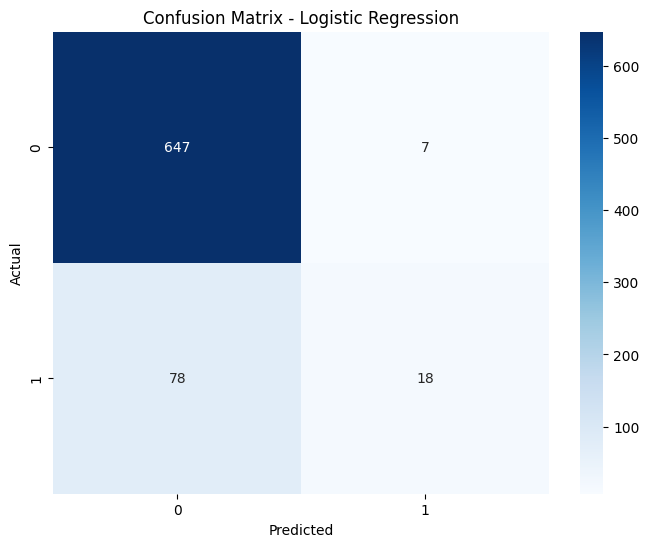

Accuracy: 0.8866666666666667
F1 Score: 0.2975206611570248
ROC-AUC: 0.8613181702344546


In [37]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'F1 Score: {f1_score(y_test, y_pred_lr)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_lr)}')

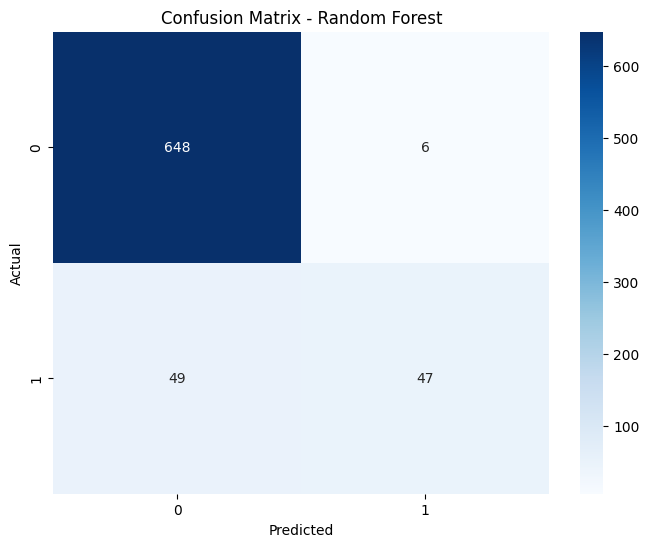

Accuracy: 0.9266666666666666
F1 Score: 0.6308724832214765
ROC-AUC: 0.9570272680937818


In [38]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_rf)}')

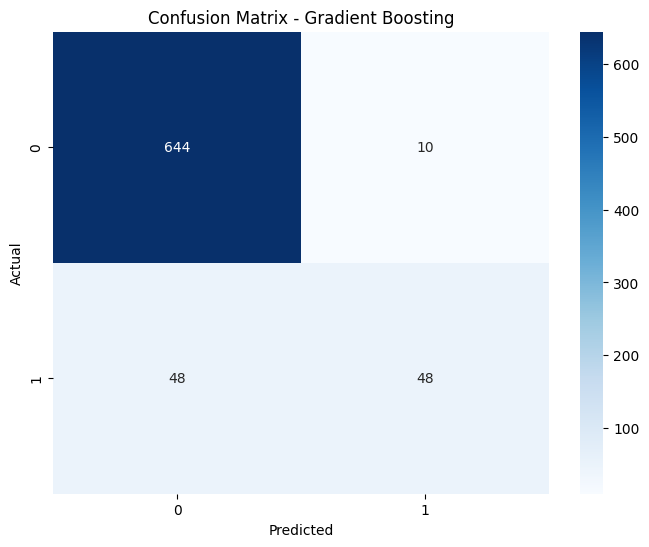

Accuracy: 0.9226666666666666
F1 Score: 0.6233766233766234
ROC-AUC: 0.9563583078491336


In [39]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_gb)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob_gb)}')

In [40]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print()

In [41]:
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb)

===== Logistic Regression =====
Accuracy: 0.8866666666666667
F1 Score: 0.2975206611570248
ROC-AUC: 0.8613181702344546

===== Random Forest =====
Accuracy: 0.9266666666666666
F1 Score: 0.6308724832214765
ROC-AUC: 0.9570272680937818

===== Gradient Boosting =====
Accuracy: 0.9226666666666666
F1 Score: 0.6233766233766234
ROC-AUC: 0.9563583078491336



In [42]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

,0
mobile_app_logins,0.340251
transactions_last_month,0.124390
support_calls,0.112267
service_fee,0.108701
balance,0.096412
months_with_bank,0.079605
age,0.074358
has_credit,0.012981
region_Kutaisi,0.010594
region_Tbilisi,0.010562
